In [1]:
import numpy as np
import matplotlib
from matplotlib import animation
from matplotlib import pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

# Create the environment, value table and policy

In [2]:
def render_env(env):
    frame = env.render(mode='rgb_array')
    plt.axis('off')
    plt.imshow(frame)
    return frame

### Create the environment

In [3]:
env = Maze()

### Create the Q(s, a) table

In [13]:
action_values = np.zeros((5, 5, 4))

### Create the target policy

In [5]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [6]:
def exploratory_policy(state):
    return np.random.randint(4)

### Plot the policy

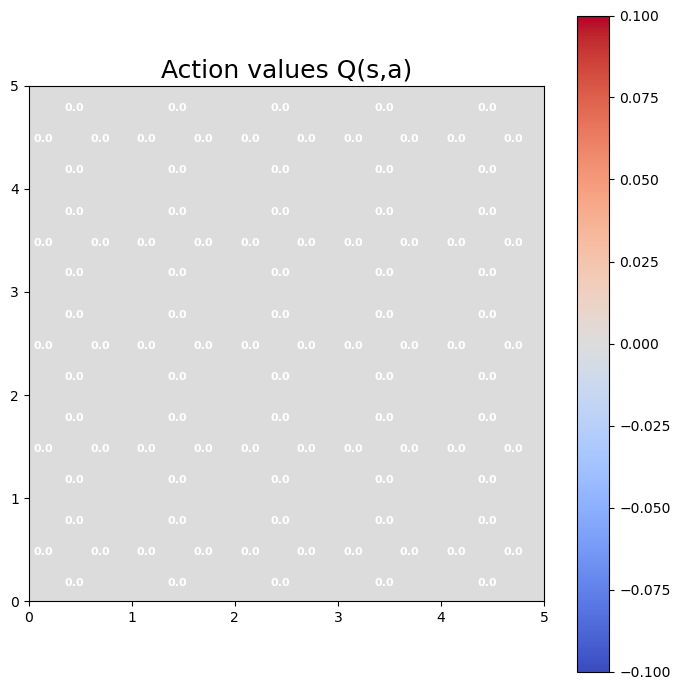

In [7]:
plot_action_values(action_values)

### Plot the policy

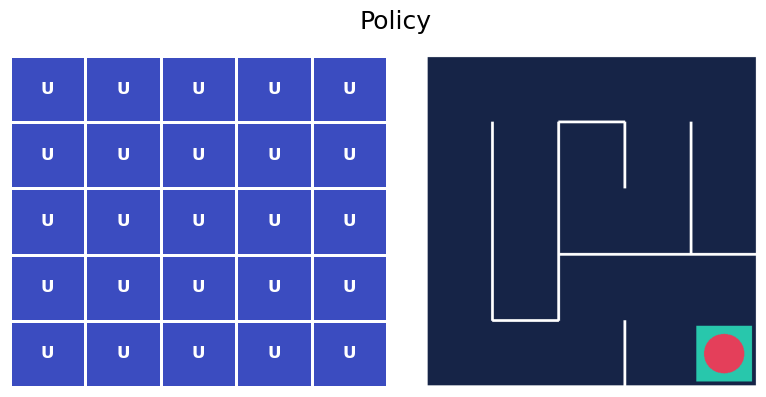

In [9]:
plot_policy(action_values, env.render(mode='rgb_array'))

### Implement the algorithm

In [14]:
def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha=0.1, gamma=0.99):

    for episode in range(1, episodes + 1):
        state = env.reset()
        done = False

        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            next_action = target_policy(next_state)

            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            
            state = next_state

In [15]:
q_learning(action_values, exploratory_policy, target_policy, episodes=1000)

# Show results

### Show resuting value table Q(s, a)

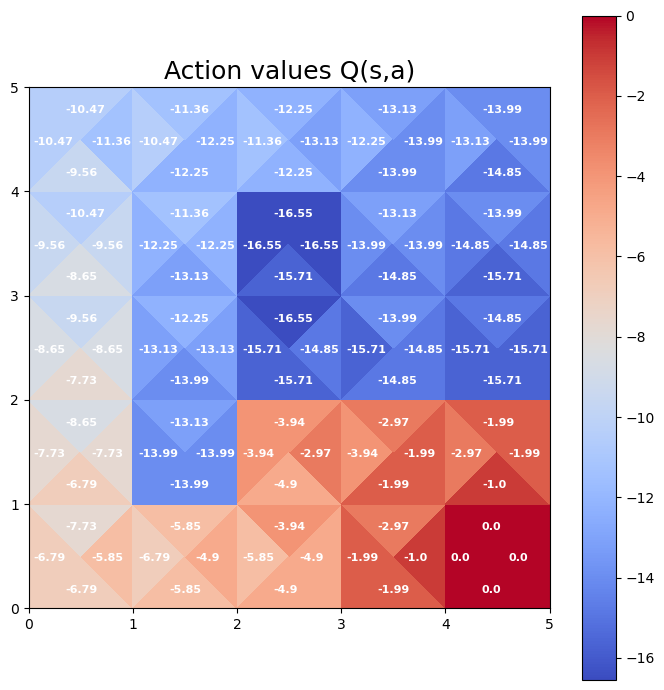

In [16]:
plot_action_values(action_values)

### Show resulting policy

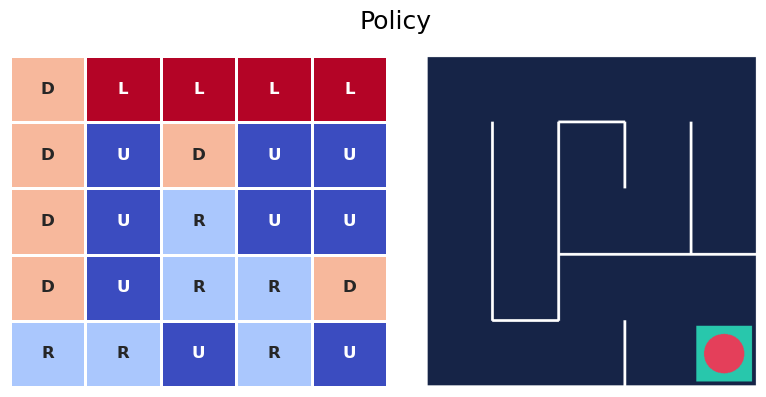

In [18]:
plot_policy(action_values, env.render(mode='rgb_array'))

### Test the result agent

In [20]:
test_agent(env, target_policy, episodes=1)